In [24]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [9]:
df1=pd.read_csv('heart_failure_clinical_records.csv')

In [10]:
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df1.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
df1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
df1.duplicated().sum()

0

In [13]:
df1.corr()['high_blood_pressure']

age                         0.093289
anaemia                     0.038182
creatinine_phosphokinase   -0.070590
diabetes                   -0.012732
ejection_fraction           0.024445
high_blood_pressure         1.000000
platelets                   0.049963
serum_creatinine           -0.004935
serum_sodium                0.037109
sex                        -0.104615
smoking                    -0.055711
time                       -0.196439
DEATH_EVENT                 0.079351
Name: high_blood_pressure, dtype: float64

In [14]:
X=df1.iloc[:,0:12]
y=df1.iloc[:,-1]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=10)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [17]:
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
Rf = RandomForestClassifier()
Rf.fit(X_train_scaled, y_train)
y_predict = Rf.predict(X_test_scaled)
accuracy_score(y_test, y_predict)

0.8333333333333334

In [19]:
cm = confusion_matrix(y_test, y_predict)
acc=accuracy_score(y_test, y_predict)
pre=precision_score(y_test, y_predict)
rec=recall_score(y_test, y_predict)
f1=f1_score(y_test, y_predict)
specificity = recall_score(np.logical_not(y_test) , np.logical_not(y_predict))
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print(f"Accuracy = {acc} , Precission = {pre} , Recall = {rec} , F1 Score = {f1} ")

Accuracy = 0.8333333333333334 , Precission = 0.7333333333333333 , Recall = 0.7586206896551724 , F1 Score = 0.7457627118644068 


In [25]:
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.5f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.5f'%roc_auc,color='red')
    plt.legend(loc='lower right', fontsize='xx-large')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.15])
    plt.xlabel('False Positive Rate', fontsize='xx-large')
    plt.ylabel('True Positive Rate', fontsize='xx-large')
    plt.xticks(fontsize='xx-large')  
    plt.yticks(fontsize='xx-large')  
    plt.grid(True)  
    plt.show()
    plt.show()




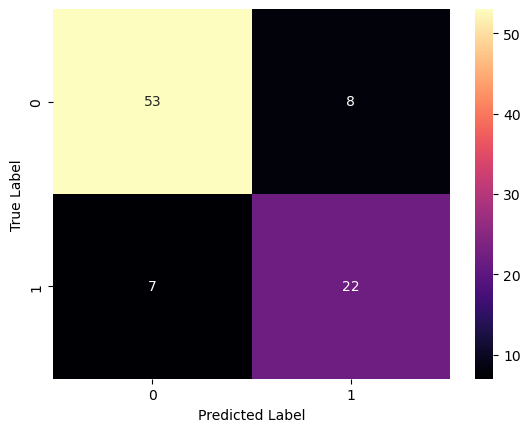

ROC AUC=0.81374


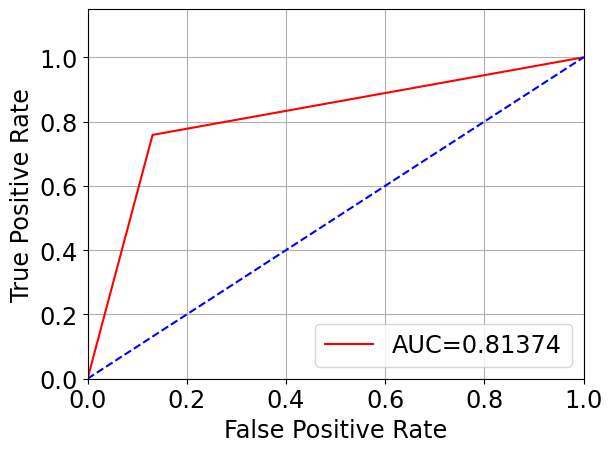

In [26]:
heatmap=sns.heatmap(cm, annot=True,   fmt='d', cmap='magma', annot_kws={"fontsize":10})
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('True Label', fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plot_roc(y_test, y_predict)

In [27]:
Rf.feature_importances_

array([0.08908614, 0.01107833, 0.08381627, 0.01828921, 0.12600907,
       0.01323606, 0.08540333, 0.14361298, 0.07750875, 0.01148298,
       0.01227667, 0.32820021])

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

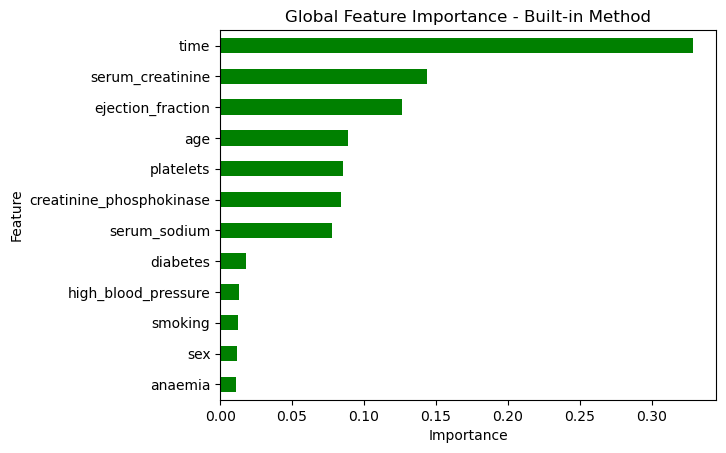

In [28]:
global_importances = pd.Series(Rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [31]:
from sklearn.inspection import permutation_importance



result = permutation_importance(Rf, X_test, y_test, n_repeats=10, random_state=10)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
serum_creatinine,-2.222222e-03,0.006667
ejection_fraction,-1.111111e-03,0.009230
smoking,0.000000e+00,0.000000
high_blood_pressure,0.000000e+00,0.000000
age,0.000000e+00,0.000000
creatinine_phosphokinase,0.000000e+00,0.000000
platelets,0.000000e+00,0.000000
sex,0.000000e+00,0.000000
time,0.000000e+00,0.000000
diabetes,0.000000e+00,0.000000


In [32]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [33]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [34]:
from sklearn.model_selection import GridSearchCV

Rf_grid = GridSearchCV(estimator = Rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [35]:
Rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [39]:
Rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.5,
 'n_estimators': 120}

In [38]:
Rf_grid.best_score_

0.8663182346109176

In [23]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.6175480293127352


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6784\3155302612.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


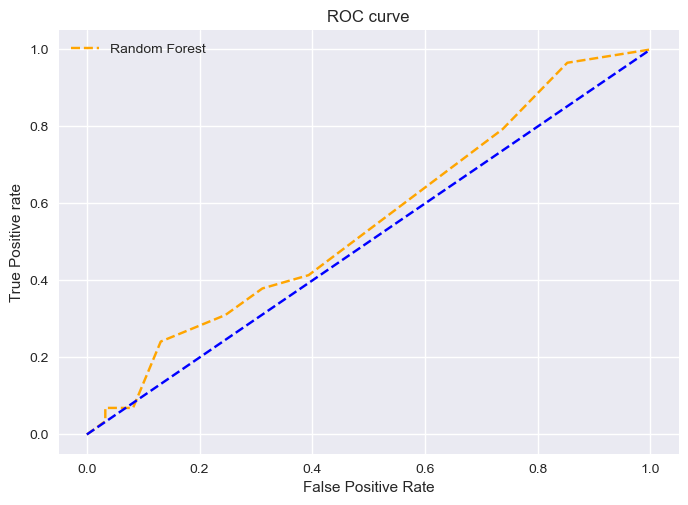

In [74]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [24]:
!pip install xgboost

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import xgboost as xgb

In [3]:
df = pd.read_csv('heart_failure_clinical_records.csv')

In [4]:
X = df.iloc[:,0:12]
y = df.iloc[:,-1]

In [17]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [18]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [20]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [21]:
df = pd.read_csv('heart_failure_clinical_records.csv')

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=10)

In [8]:
scaler = StandardScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [41]:
print(X_train.shape)
print(X_test.shape)

(209, 12)
(90, 12)


In [9]:
df1 = pd.read_csv('heart_failure_clinical_records.csv')

In [10]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=10)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [11]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8333333333333334

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

# for xgb


In [59]:
pre=precision_score(y_test,y_pred)

In [62]:
pre

0.8076923076923077

In [60]:
re=recall_score(y_test,y_pred)

In [61]:
re

0.7241379310344828

In [64]:
f1=f1_score(y_test,y_pred)

In [65]:
f1

0.7636363636363636

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        61
           1       0.81      0.72      0.76        29

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90



In [4]:
df = pd.read_csv('heart.csv')

In [5]:
X = df.iloc[:,0:13]
Y = df.iloc[:,-1]

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [73]:
scaler = StandardScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [7]:
Rf=RandomForestClassifier()
Rf.fit(X_train,Y_train)

RandomForestClassifier()

# for rf


In [8]:
Rf.fit(X_train,Y_train)
Y_pred = Rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8688524590163934

In [76]:
pre=precision_score(Y_test,Y_pred)

In [77]:
pre


0.8484848484848485

In [78]:
re=recall_score(Y_test,Y_pred)

In [79]:
re

0.875

In [80]:
f1=f1_score(Y_test,Y_pred)

In [81]:
f1

0.8615384615384615

In [82]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



[[24  5]
 [ 3 29]]


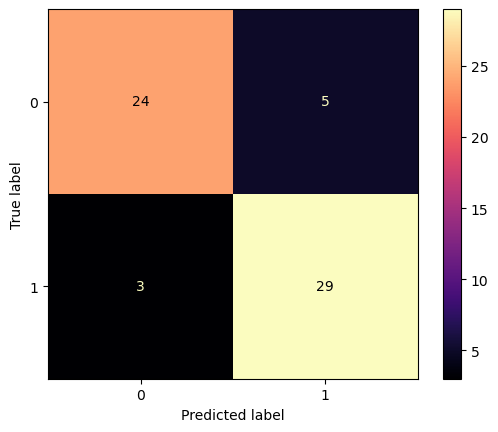

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred,cmap="magma")
print(confusion_matrix(Y_test, Y_pred))

In [90]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(X_train,Y_train)
    Y_pred_train = model_name.predict(X_train)
    Y_pred_test = model_name.predict(X_test)
    print("The TRAIN accuracy is",accuracy_score(Y_train,Y_pred_train))
    print("The ROC score for TRAIN data is",roc_auc_score(Y_train,Y_pred_train))
    plt.figure(figsize=(9,4))
    fpr,tpr,thresholds = roc_curve(Y_train,model_name.predict_proba(X_train)[:,1])
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.grid()
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(Y_test,Y_pred_test))
    print("The ROC score for TEST data is",roc_auc_score(Y_test,Y_pred_test))
    plt.figure(figsize=(9,4))
    fpr,tpr,thresholds = roc_curve(Y_test,model_name.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.grid()
    plt.show()

For the RandomForestClassifier()
The TRAIN accuracy is 1.0
The ROC score for TRAIN data is 1.0


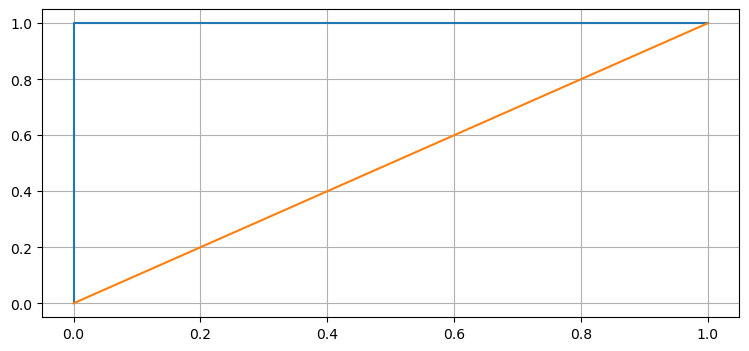

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8524590163934426
The ROC score for TEST data is 0.8512931034482758


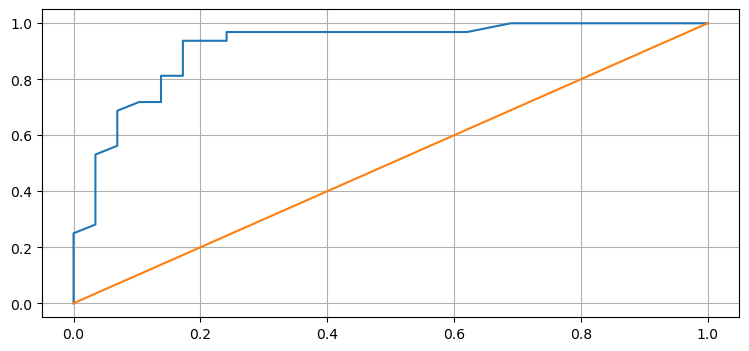

In [91]:
predictor(Rf)

In [92]:
from mealpy import HBA

In [93]:
hba = HBA.OriginalHBA

In [94]:
predictor(hba)

For the <class 'mealpy.swarm_based.HBA.OriginalHBA'>


AttributeError: type object 'OriginalHBA' has no attribute 'fit'

In [46]:
Rf.feature_importances_.shape

(12,)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

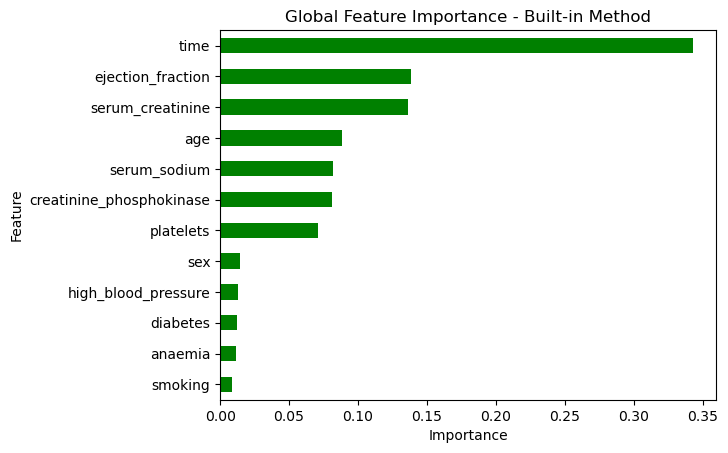

In [47]:
global_importances = pd.Series(Rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [49]:
from sklearn.inspection import permutation_importance



result = permutation_importance(Rf, X_test, y_test, n_repeats=10, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
high_blood_pressure,-0.013333,0.006667
creatinine_phosphokinase,-0.008889,0.006667
ejection_fraction,-0.003333,0.008678
smoking,-0.001111,0.005984
platelets,0.001111,0.007778
serum_creatinine,0.002222,0.008315
sex,0.008889,0.017778
age,0.013333,0.014741
diabetes,0.013333,0.015556
anaemia,0.026667,0.020000


In [16]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]


In [18]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [19]:
from sklearn.model_selection import GridSearchCV

Rf_grid = GridSearchCV(estimator = Rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [20]:
Rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [22]:
Rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.75, 'n_estimators': 60}

In [23]:
Rf_grid.best_score_

0.8785460992907803

In [3]:
df1=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [4]:
df1

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [57]:
df1.isnull().mean()

age                 0.000000
gender              0.000000
tot_bilirubin       0.000000
direct_bilirubin    0.000000
tot_proteins        0.000000
albumin             0.000000
ag_ratio            0.000000
sgpt                0.000000
sgot                0.000000
alkphos             0.006861
is_patient          0.000000
dtype: float64

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [75]:
imputer1 = SimpleImputer(strategy='mean')
trf = ColumnTransformer([
    ('imputer1',imputer1,['alkphos']),
  
],remainder='passthrough')

trf.fit(X_train)
trf.fit(X_test)
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [76]:
X_train

array([[0.8, 68, 'Female', ..., 127, 4.6, 2.1],
       [1.0, 31, 'Male', ..., 32, 6.8, 3.4],
       [1.4, 28, 'Male', ..., 14, 4.1, 2.4],
       ...,
       [1.0, 37, 'Male', ..., 54, 9.5, 4.9],
       [1.7, 17, 'Female', ..., 21, 7.1, 4.5],
       [1.55, 17, 'Male', ..., 45, 6.9, 4.2]], dtype=object)

In [77]:
df1.isnull().mean()

age                 0.000000
gender              0.000000
tot_bilirubin       0.000000
direct_bilirubin    0.000000
tot_proteins        0.000000
albumin             0.000000
ag_ratio            0.000000
sgpt                0.000000
sgot                0.000000
alkphos             0.006861
is_patient          0.000000
dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

In [5]:
X = df1.iloc[:,0:10]
Y = df1.iloc[:,-1]

In [18]:
X

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int64)
X_train_new= ohe.fit_transform(X_train[['gender']])

# also the test data
X_test_new = ohe.fit_transform(X_test[['gender']])



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
X_train_transformed=np.hstack((X_train[['age','tot_bilirubin','direct_bilirubin','tot_proteins','albumin','ag_ratio','sgpt','sgot','alkphos']].values,X_train_new))
X_test_transformed=np.hstack((X_test[['age','tot_bilirubin','direct_bilirubin','tot_proteins','albumin','ag_ratio','sgpt','sgot','alkphos']].values,X_test_new))

In [72]:
X_train_transformed

array([[68.  ,  0.6 ,  0.1 , ...,  0.8 ,  1.  ,  0.  ],
       [31.  ,  1.3 ,  0.5 , ...,  1.  ,  0.  ,  1.  ],
       [28.  ,  0.8 ,  0.3 , ...,  1.4 ,  0.  ,  1.  ],
       ...,
       [37.  ,  0.7 ,  0.2 , ...,  1.  ,  0.  ,  1.  ],
       [17.  ,  0.5 ,  0.1 , ...,  1.7 ,  1.  ,  0.  ],
       [17.  ,  0.9 ,  0.2 , ...,  1.55,  0.  ,  1.  ]])

In [73]:
X_test_transformed

array([[19.  ,  1.4 ,  0.8 , ...,  4.6 ,  1.3 ,  1.  ],
       [12.  ,  1.  ,  0.2 , ...,  3.7 ,  1.  ,  1.  ],
       [60.  ,  5.7 ,  2.8 , ...,  3.2 ,  0.78,  1.  ],
       ...,
       [47.  ,  3.  ,  1.5 , ...,  1.8 ,  0.47,  0.  ],
       [27.  ,  1.3 ,  0.6 , ...,  4.8 ,   nan,  1.  ],
       [21.  ,  0.7 ,  0.2 , ...,  4.1 ,  1.2 ,  1.  ]])

In [74]:
df1.isnull().mean()

age                 0.000000
gender              0.000000
tot_bilirubin       0.000000
direct_bilirubin    0.000000
tot_proteins        0.000000
albumin             0.000000
ag_ratio            0.000000
sgpt                0.000000
sgot                0.000000
alkphos             0.006861
is_patient          0.000000
dtype: float64